# Video Analysis Pipeline

Videos can be analysed quickly using this script. This allows for rapidly testing different conditions while maintaining low statistical errors.

In [1]:
import numpy as np
import bubble as bubl

%matplotlib notebook
from matplotlib import pyplot as plt

In [2]:
# Load the video and do check if the bubbles
# are detected correctly
track = bubl.Tracker()
track.load_video("../data/vid_12.mp4")

829

### Use this to adjust detection settings to video

Total number of points: 52


<IPython.core.display.Javascript object>


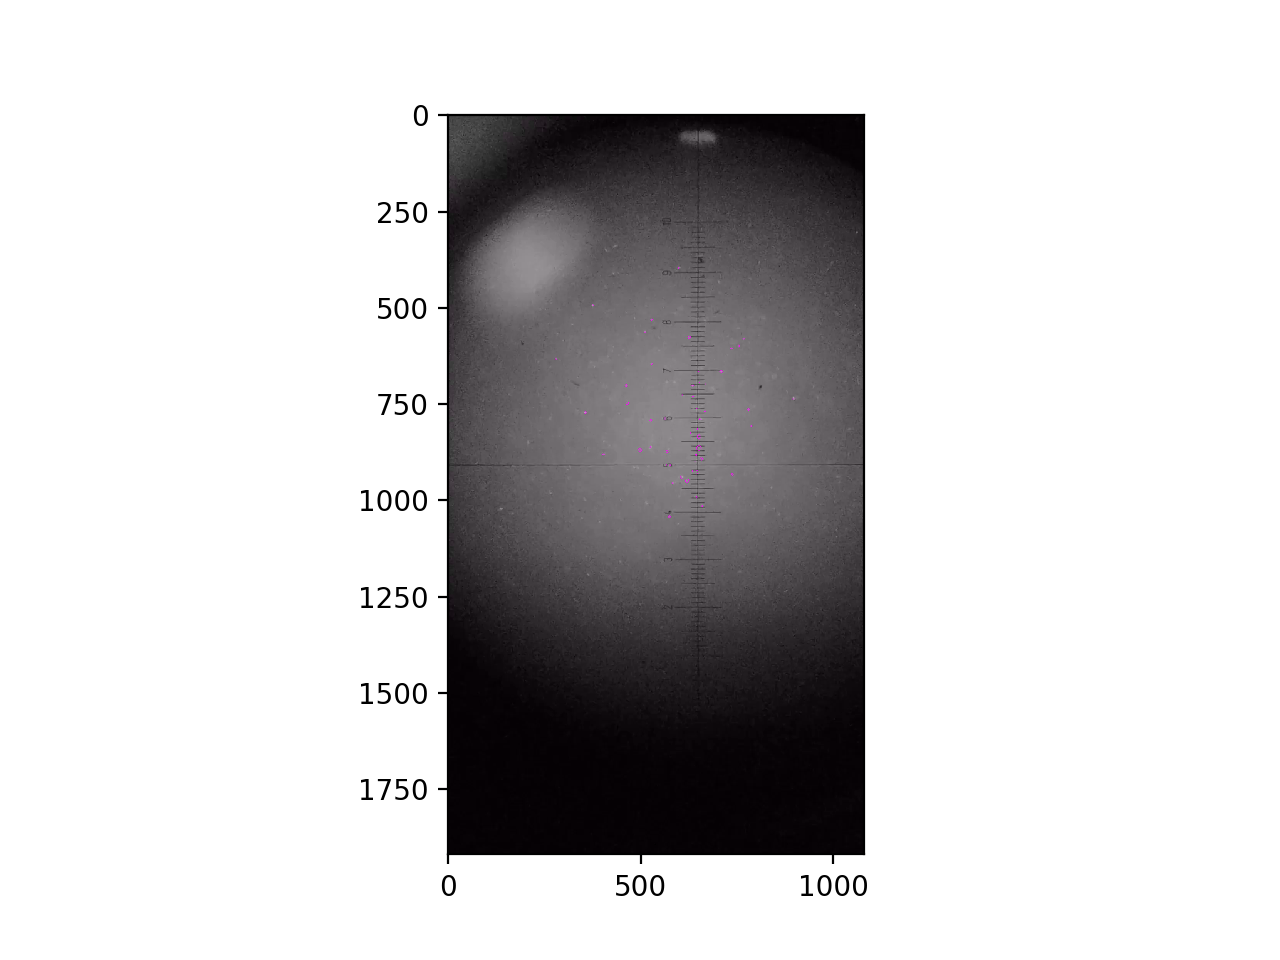

In [36]:
# Determine detection settings (manually as per video quality)
track.params.minArea = 1

pts, img = track.test_keypoints(0)
print("Total number of points:", len(pts))

_, ax = plt.subplots()
ax.imshow(img)
plt.show()

### Adjust data transform
Use the above view to determine the position of the center and the lower mark ('4'). Also enter the video time, the time at which the voltage was turned on, and the voltage.

In [54]:
# Fill these in for the given video
pos_center  = (648.9, 909.4) # (x, y)
pos_lower   = (648.9, 1030.8) # (x, y)
time_full   = 28.0 # in seconds
time_switch = 10.0 # in seconds
voltage = 554.0 # in volts

# Variables given by lab-book
microscope_scale = 0.5e-3 # in meters
seperation = 123
# TODO (do later, after problems)

In [5]:
# Track bubbles (the magic part)
track.track()

In [11]:
# Obtain trajectories
traces = [b.trajectory for b in track.bubbles]
times  = [np.arange(b.first_seen, b.last_seen, (b.last_seen-b.first_seen)/len(b.trajectory)) * time_full / len(track.frames) for b in track.bubbles]

<IPython.core.display.Javascript object>


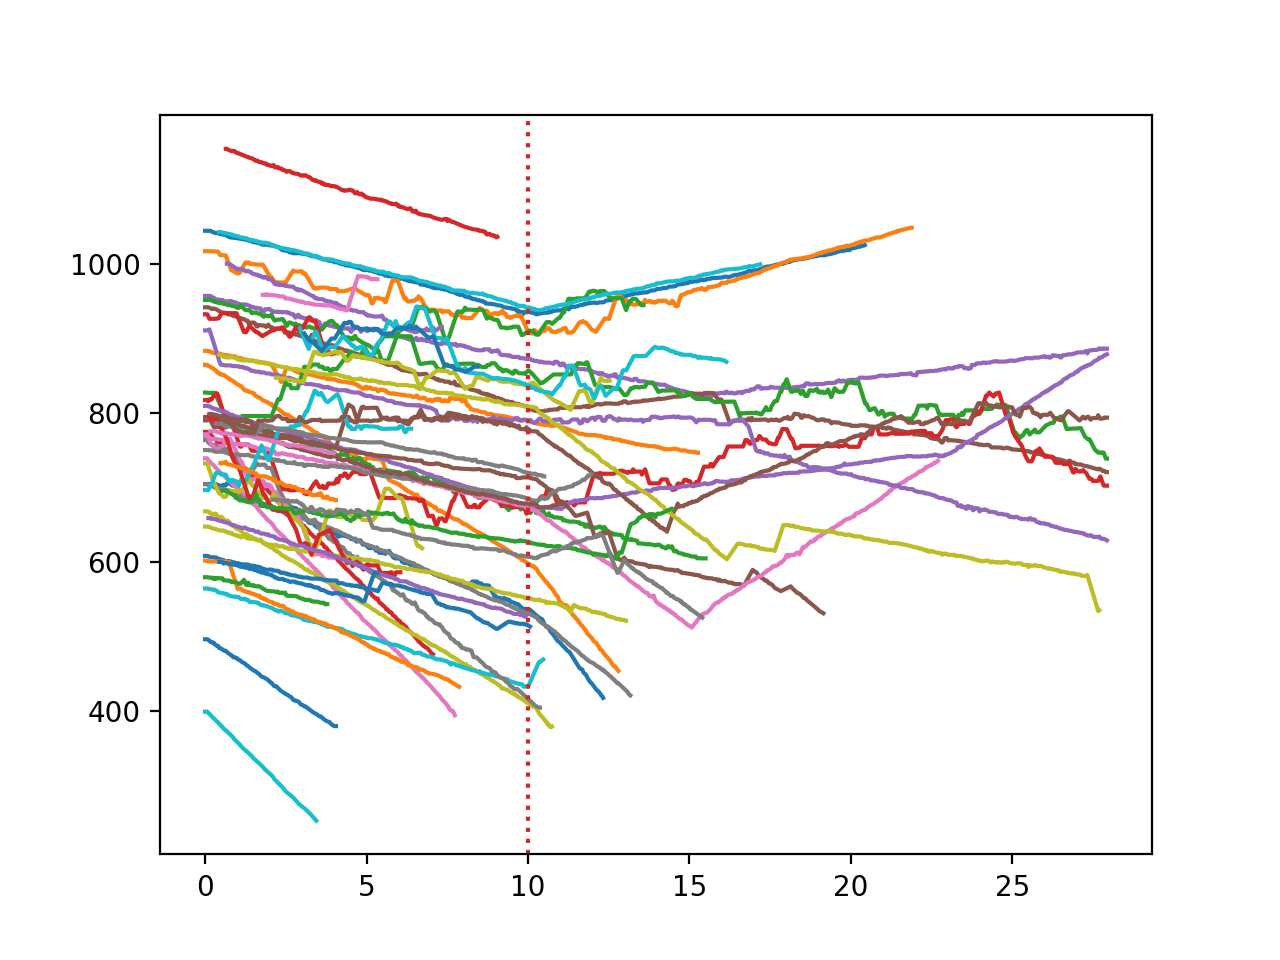

In [30]:
_, ax = plt.subplots()
for i, trace in enumerate(traces):
    ax.plot(times[i], [p[1] for p in trace])
ax.axvline(time_switch, color="tab:red", linestyle="dotted")
plt.show()

## Filter data
Include only traces that cross the voltage transition and only consider a 100 frame neighbourhood.

Here, we also transform the data from pixel and frame to physical 

In [29]:
f_traces = []
f_times  = []
neighbourhood   = 100

for i, trace in enumerate(traces):
    # Find index at time_switch
    idx_switch = None
    for j in range(1, len(times[i])):
        if times[i][j-1] < time_switch and times[i][j] >= time_switch:
                   idx_switch = j
                   break
    if idx_switch is None:
                   continue
    # Grab slice of 100 frame neighbourhood
    tr = trace[idx_switch - neighbourhood:idx_switch + neighbourhood]
    ti = times[i][idx_switch - neighbourhood:idx_switch + neighbourhood]
    if len(tr) == neighbourhood * 2:
        f_traces.append(tr)
        f_times.append(ti)

# Count the results
print("Number of final data points:", len(f_traces))

Number of final data points: 19


In [55]:
# Rotate points and convert to meters
theta = np.arctan((pos_lower[0]-pos_center[0])/(pos_lower[1]-pos_center[1]))
rotation = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

# Rotate each point and scale to correct units
origin = np.array(pos_center)
for i, trace in enumerate(f_traces):
    f_traces[i] = np.matmul(rotation, (trace-origin).transpose()).transpose()
    f_traces[i] = f_traces[i] * microscope_scale / (pos_lower[1]-pos_center[1])

In [33]:
# Obtain approximate instantaneous velocities


In [ ]:
# Do final analysis on each droplet and display results